<a href="https://colab.research.google.com/github/muhendis/dev-pykasif/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/dikey eksen/code

/content/drive/MyDrive/dikey eksen/code


In [2]:
# kendi yazdığımız yardımcı kütüphanemiz
from assistant.eda import ProfillingReport
from assistant.datacleaning import DataCleaning
from assistant.featureselection import FeatureSelection

# temel kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# eğitim için
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# performans ölçümü
from sklearn.metrics import accuracy_score

# proje dosyasındaki uyarılar için
import warnings
warnings.simplefilter(action='ignore')


# 1. Veriyi yükleme ve anlama

Titanic gemisi, tarihin en kötü kazalarından biridir. 15 Nisan 1912'de Titanic ilk seferi sırasında bir buzdağıyla çarpıştıktan sonra battı ve 2224 yolcu ve mürettebattan 1502'sini öldü. Bu sansasyonel trajedi uluslararası toplumu şok etti ve gemiler için daha iyi güvenlik düzenlemelerine yol açtı. Hayatta kalmak için bir miktar şans unsuru olsa da, bazı insan gruplarının hayatta kalma olasılığı diğerlerinden daha yüksekmiş gibi görünüyor.


Biz ise bu gemide yera alanlar kişilerin bilgilerini içeren veri setini kullanarak kimlerin hayatta kaldığını tahmin etmeye çalışan bir makine öğrenmesi modeli kuracağız.

Veri setini seaborn kütüphanesinden load_dataset() fonksiyonu ile yapabiliyoruz.



In [3]:
df = sns.load_dataset("titanic")

Veri çerçevesine genel olarak bakmak istediğimizde df değişkenini çağırarak görüntüleyebiliriz.

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True



Yukarıdaki veri setinde her bir satır bir yolcuya ait bilgileri içeriyor. Bu bilgiler kişinin ekonomik statüsden cinsiyetine kadar bilgileri içeriyor. Veri setinde yer alan özniteliklerin ne anlam içeriklerine bakalım.

* Survived : Titanic gemisinde hayatta kalanlar 1 , hayatta kalmayanlar 0
* Pclass :  Ekonomi statüsüdür
  * 1 = Üst
  * 2 = Orta
  * 3 = Düşük
* Sex : Male/Female
* Age : Yolcuların Yaşları
* SibSp : Gemideki kardeş ve eş sayısını verir 
* Parch : Gemideki ebeveyn ve çocuk sayısını söyler
* Fare : Bilet fiyatı
* embark	 : Liman isimleri (C, Q, S)
  * C = Cherbourg, 
  * Q = Queenstown,
  * S = Southampton
* class :  Ekonomi statüsüdür
  * First = Üst
  * Second = Orta
  * Third = Düşük
* who: Yaşa göre sınıflama
 * man (18+)
 * woman (18+)
 * child (18 küçük)
* adult_male: 18 yaşında veya daha büyük bir erkek (0 = Hayır, 1=Evet)
* deck : geminin güvertesi
* embark_town	 : Liman isimleri (C, Q, S)
  * C = Cherbourg, 
  * Q = Queenstown,
  * S = Southampton
* alive: Yes, no
* alone: 1= yalnız, 0= yalnız değil (gemide en az 1 kardeşiniz, eşiniz, ebeveyniniz veya çocuğunuz var)





> **Aynı anlamı veren yinelenen sütunları silme**



Yukarıdaki açıklamalara bakıldığında, pclass ve class sütunları aynı değerleri temsil ediyor. Aynı şekil embarked ve embark_town sütunları da aynı değerleri ifade ediyor. Bu yüzden pclass ve embarked sütunları siliyoruz. Eğer silmezsek makine öğrenmesi modeline faydasından ziyade zarar verir. Ve ek olarak  bazı değişkenler bazı bilgileri bünyesinde taşıyorken ek olarak başka bir sütunda da farklı şekilde  belirtilmiş. 

* Bunlar bir tanesi adult_male'dir. adult_male değişkenini de silmeliyiz çünkü aynı bilgilerin daha fazlasını who değişkeni man(erkek), woman (kadın) ve child (çocuk) olarak içeriyor

* Başka bir tanesi ise alone'dir. alone değişkenini de silmeliyiz çünkü aynı bilgilerin daha fazlasını sibsp	ve parch	değişkenleri içeriyor

* Sonuncu ise alive'dir. alive değişkenini de silmeliyiz çünkü aynı bilgileri survived	değişkenleri içeriyor
------------


In [5]:
df=df.drop(['pclass', 'embarked','adult_male','alone','alive'], axis=1)
df

,survived,sex,age,sibsp,parch,fare,class,who,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,man,NaN,Southampton
1,1,female,38.0,1,0,71.2833,First,woman,C,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,woman,NaN,Southampton
3,1,female,35.0,1,0,53.1000,First,woman,C,Southampton
4,0,male,35.0,0,0,8.0500,Third,man,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,man,NaN,Southampton
887,1,female,19.0,0,0,30.0000,First,woman,B,Southampton
888,0,female,NaN,1,2,23.4500,Third,woman,NaN,Southampton
889,1,male,26.0,0,0,30.0000,First,man,C,Cherbourg


> **Değişkenleri belirleme**

* **Kategorik değişkenler** :sex,sibsp,parch,class,who,deck,embark_town,

* **Sürekli değişkenler**: fare, age

* **Hedef değişken** :survived


In [6]:
categorical_variables = ['sex',
 'sibsp',
 'parch',
 'class',
 'who',
 'deck',
 'embark_town']
continuous_variables = ['age', 'fare']
target = ["survived"]

Gerekli değişkenler tespit edildiğine göre Keşifçi Veri Analizi için yazdığımız ProfillingReport sınıfından nesne oluşturma zamanıdır.


In [7]:
pr=ProfillingReport(df, continuous_variables,
               categorical_variables,
               target)

Veri setinde bulunan veri tiplerine bakmak istediğimizde pr.data_types() ve pr.df.info() araçları bize fikir verecektir. Aşağıda görüldüğü üzere çok farklı tipte verilere sahibiz.

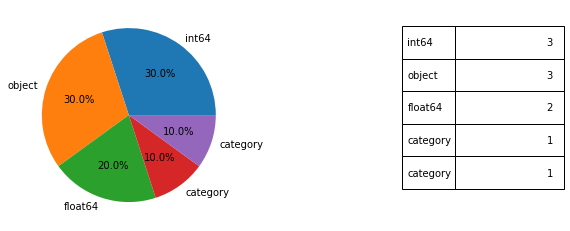

In [8]:
pr.data_types()

In [9]:
pr.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   who          891 non-null    object  
 8   deck         203 non-null    category
 9   embark_town  889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 58.0+ KB


Veri setinde kayıp hücre miktarını öğrenmek için missing_cell_count() metodu kullanıldığında bize veri setinde genel olarak ne kadar kayıp hücre olduğu hakkında fikir veriyor. Veri setinin %9.7'si kayıp diyebiliriz.

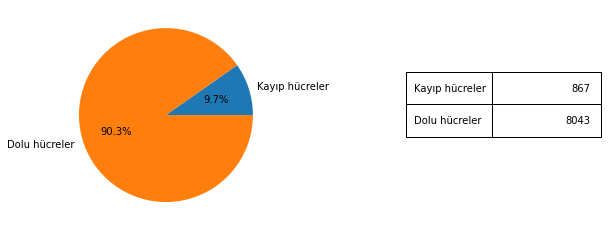

In [10]:
pr.missing_cell_count()

Kayıpları detaylı olarak incelemek için aşağıdaki hücre bize yardımcı olacaktır. Hem sayısal hem de yüzdesel bir oran elde ediyoruz. Hücrenin çıktısı incelendiğinde age, deck ve embark_down özniteliklerinde kayıp hücrelere sahip olduğumuz rahatça anlaşılıyor. Ve en çok kayıp hücreye deck özniteliği sahipmiş. Ver işleme bölümünde bu özniteliği veri setinde çıkarmalıyız. Çünkü kayıp oranı çok yüksek olduğundan tedavi etmemiz çok kolay bir iş değildir. age ve embark_town özniteliklerinde kayıplar az olduğundan tedavi edebiliriz.

In [11]:
print("Sayısal olarak : \n",pr.df.isnull().sum() )
print("\n----------------\n")
print("Yüzdelik olarak :\n" ,pr.df.isnull().sum() / (pr.df.index.stop+1))


Sayısal olarak : 
 survived         0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
deck           688
embark_town      2
dtype: int64

----------------

Yüzdelik olarak :
 survived       0.000000
sex            0.000000
age            0.198430
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
deck           0.771300
embark_town    0.002242
dtype: float64


Ve veri setinde tekrarlı bir şekilde yer alan örnekleri(satırlar) duplicate_row_count() metodu ile tespit ettiğimizde %12'lik bir değer elde ediyoruz. Veri işleme bölümünde bu tekrarlı veriler atılacaktır. Çünkü makine öğrenmesi modeli eğitiminde model negatif yönde etkilenebilir.

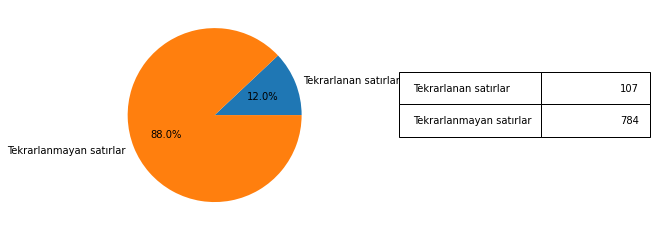

In [12]:
pr.duplicate_row_count()

Veri setinde bulunan özniteliklerin dağılımları aşağıda detaylı olarak inceleyebiliriz. Veri setinde ne kadar kadın ve erkek ? Hangi limanlardan ne kadar yolcu var ? gibi sorulara cevap verebilir.  (Bu kısmı size bırakıyorum. Çünkü kitabımızda nasıl yorum yapacağımız hakkında sizinle fikirler paylaşmıştım.)

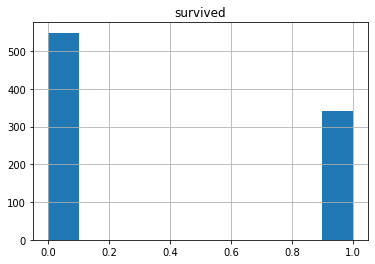

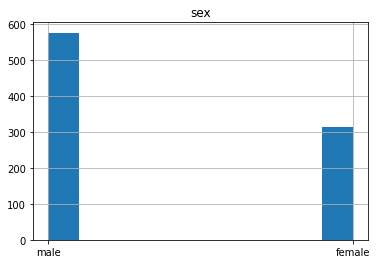

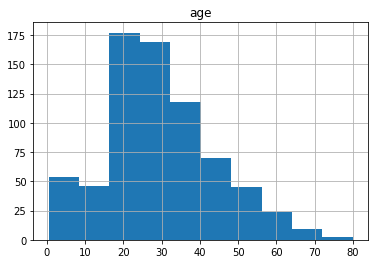

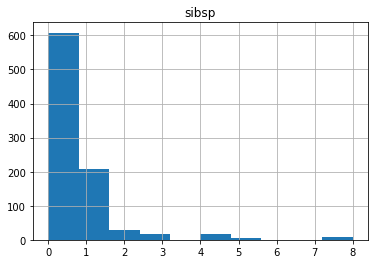

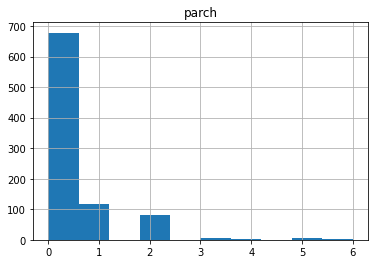

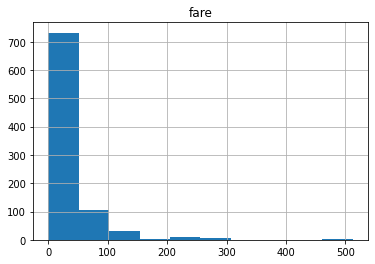

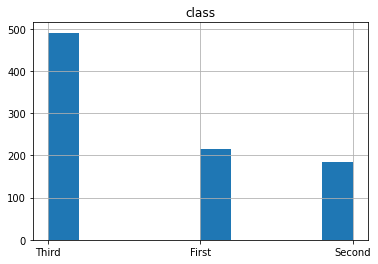

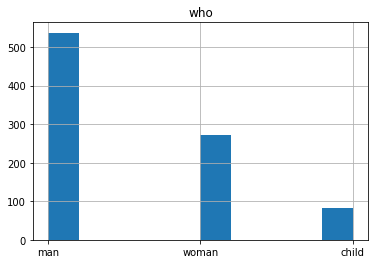

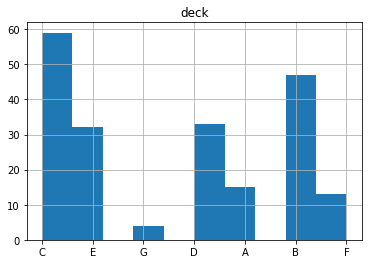

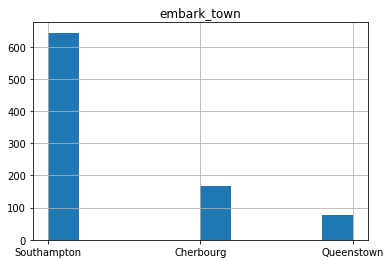

In [13]:
pr.visualize_distribution()

Veri setindeki sürekli değişkenlerden fare ve age özniteliklerini detaylı incelersek. Aşağıdaki notları çıkarabiliriz.

fare özniteliğinin mod değeri 8.05, medyan değeri 14.4542 ve ortalama değeri ise de 32.20 olduğu elde ediliyor. Sırf bu üç değere baktığımızda bile bu özniteliğin dağılımının çarpık olduğunu ve bazı aykırı değerlere sahip olduğu gibi bir izlenim yakalıyabilirim. (Fakat kesinlikle dağılımı çizdirin bu düşüncenizle kalmayınız.) Özniteliğin kutu grafiğine ve histogramına bakıldığında ise düşüncemiz de haklı olduğumuzu görüyoruz. Kutu grafiğinde oldukça aykırı değerler olduğu nokta ile temsil edilen yapılardan anlıyoruz. Tabloda kutu grafiği için önemli olan min-25%-50%-75%-max değerleri de detaylı olarak yer alıyor. Skewness değerine bakıldığında ikinci grafikte görüldüğü gibi bir çarpıklık göze çarpıyor. Yine ikinci grafiğe bakıldığında basıklık değerini temsil eden kurtosis değerinin ne kadar yüksek olduğu ortadadır. 

Uyarı : Tablodaki değerleri yorumlamada zorluk yaşıyorsanız lütfen kitaptan ilgi bölüme tekrar bakınız.


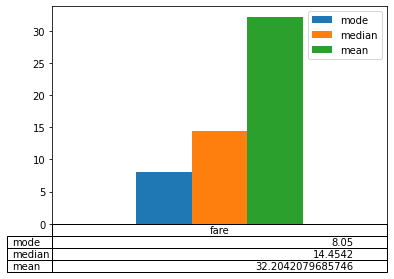

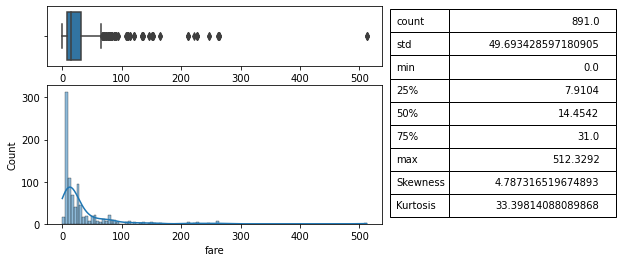

In [14]:
pr.central_tendency_measures_of_a_feature("fare")
pr.dispersion_measures_of_a_feature("fare")

* age özniteliğinin mod değeri 24, medyan değeri 28 ve ortalama değeri ise de 29.69 olduğu elde ediliyor.Bu üç değere baktığımızda fare özniteliğine oranla daha bir normal yapı sergilediğini söyleyebiliriz.Özniteliğin kutu grafiğine ve histogramına bakıldığında ise düşüncemiz de haklı olduğumuzu yine görüyoruz. Kutu grafiğinde aykırı değerleri ifade edenlerin daha az olduğu görülüyor. Tabloda kutu grafiği için önemli olan min-25%-50%-75%-max değerleri de detaylı olarak yer alıyor. Skewness değerine bakıldığında ikinci grafikte görüldüğü gibi bir normal dağılıma yakın bir gözlem elde ediliyor.  Yine ikinci grafiğe bakıldığında kurtosis basıklık değerinin düşük olduğu ortadadır. 

Uyarı : Tablodaki değerleri yorumlamada zorluk yaşıyorsanız lütfen kitaptan ilgi bölüme tekrar bakınız.


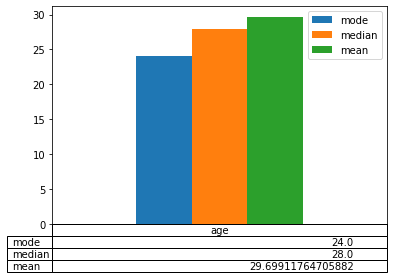

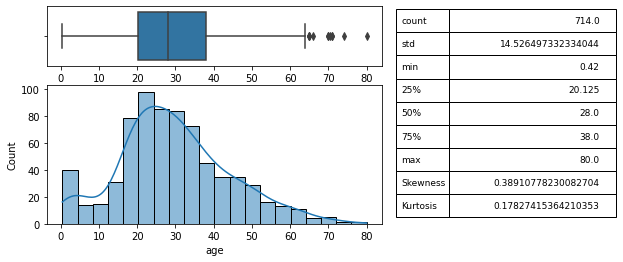

In [15]:
pr.central_tendency_measures_of_a_feature("age")
pr.dispersion_measures_of_a_feature("age")

Kovaryans matrisinde yer alan sürekli değişkenlerin birbirleri ile pozitif yönde olduğu görülüyor. 

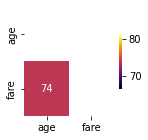

In [16]:
pr.covariance_matrix()

Aşağıda görüldüğü üzere iki değişken arasında bir yüksek korelasyon olmadığından bunlardan birini veri setinden çıkarmamıza gerek yoktur. Bu sonuca correlation_analysis() metodunun çıktısındaki %9.61 değer ile jointplot("age","fare") çizimindeki doğrusal dağılmayan noktalardan varıldı.


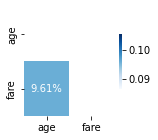

In [17]:
pr.correlation_analysis()

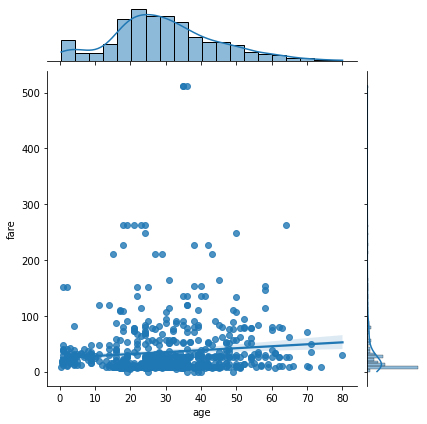

In [18]:
pr.jointplot("age","fare")

# 2. Veriyi temizleme

Veriyi temizlemeye geçmeden önce makine öğrenmesi için hedef değişken(tahmin edilmek istenen) (y) ile tahmin edici değişkenleri (X)(bağımsız değişkenler) veriyi doğru bölmek için ayırmamız gerekiyor.


In [19]:
y=df.loc[:,"survived"]
X=df.loc[:,[ 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'deck', 'embark_town']]

In [20]:
X

,sex,age,sibsp,parch,fare,class,who,deck,embark_town
0,male,22.0,1,0,7.2500,Third,man,NaN,Southampton
1,female,38.0,1,0,71.2833,First,woman,C,Cherbourg
2,female,26.0,0,0,7.9250,Third,woman,NaN,Southampton
3,female,35.0,1,0,53.1000,First,woman,C,Southampton
4,male,35.0,0,0,8.0500,Third,man,NaN,Southampton
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,NaN,Southampton
887,female,19.0,0,0,30.0000,First,woman,B,Southampton
888,female,NaN,1,2,23.4500,Third,woman,NaN,Southampton
889,male,26.0,0,0,30.0000,First,man,C,Cherbourg


In [21]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

Şimdi veriyi işlemek için veriyi bölmemiz gerekiyor. Veri bölme işlemini Eğitim(Train)-Test(Test) diye ayrım yapıyoruz. Bunun için yukarıdaki kodlarda çağırdığımız train_test_split fonksiyonunu kullanacağız. Aşağıdaki blokta, verinin %67'si eğitim %33'ü test veri seti olarak ayrılıyor. Ve random_state diye adlandırılan parametre ise verinin aynı rastgelelik ile bölünmesini sağlıyor. Yani bu komut çalıştığın eğitim ve test kümesi aynı şekil ayrılacaktır. Kodun çıktısına baktığımızda ise X_train ve y_train eğitim için oluşturulurken, X_test ve y_test ise performansı ölçmek için oluşturuldu.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Artık veriler ayrıldığına göre bunları bizim veri temizleme sınıfımız olan DataCleaning sınıfına gönderilmek için ayarlayalım . Aşağıdaki kod bloğunda eğitim için oluşturulan X_train ve y_train veri setleri birleştirilip df_train değişkenine atanıyor. Ardında da test için oluşturulan X_test ve y_test veri setleri de birleştirilip df_test değişkenine atanıyor.


In [23]:
#--------------------------------------------#

df_train_X = pd.DataFrame(data=X_train.values,columns=X.columns)
df_train_y = pd.DataFrame(data=y_train.values,columns=[y.name])


df_train = pd.concat([df_train_X, df_train_y],axis=1)

#--------------------------------------------#
df_test_X = pd.DataFrame(data=X_test.values,columns=X.columns)
df_test_y = pd.DataFrame(data=y_test.values,columns=[y.name])

df_test = pd.concat([df_test_X, df_test_y],axis=1)
  


Veri temizlemek için DataCleaning sınıfından bir nesne üreterek işlemlere devam edebiliriz.
 


In [24]:
dc=DataCleaning(df_train,df_test)


Veri temizleme sınıfında yer alan eğitim veri setine bakmak için aşağıdaki komutu çalıştıralım. Ve göreceğiz ki en başta okuduğumuz veri setinin %67'si eğitim veri setinde olduğunu.


In [25]:
dc.df_train


,sex,age,sibsp,parch,fare,class,who,deck,embark_town,survived
0,male,54,0,0,51.8625,First,man,E,Southampton,0
1,male,NaN,0,0,15.5,Third,man,NaN,Queenstown,0
2,male,25,1,2,41.5792,Second,man,NaN,Cherbourg,0
3,male,26,1,0,14.4542,Third,man,NaN,Cherbourg,0
4,female,22,0,0,10.5167,Third,woman,NaN,Southampton,0
...,...,...,...,...,...,...,...,...,...,...
591,female,21,0,0,7.65,Third,woman,NaN,Southampton,1
592,male,NaN,0,0,31,First,man,NaN,Southampton,0
593,male,41,2,0,14.1083,Third,man,NaN,Southampton,0
594,female,14,1,2,120,First,child,B,Southampton,1


Veri temizleme sınıfında yer alan test veri setine bakmak için aşağıdaki komutu çalıştıralım. Ve göreceğiz ki en başta okuduğumuz veri setinin %37'si eğitim veri setinde olduğunu.


In [26]:
dc.df_test



,sex,age,sibsp,parch,fare,class,who,deck,embark_town,survived
0,male,NaN,1,1,15.2458,Third,man,NaN,Cherbourg,1
1,male,31,0,0,10.5,Second,man,NaN,Southampton,0
2,male,20,0,0,7.925,Third,man,NaN,Southampton,0
3,female,6,0,1,33,Second,child,NaN,Southampton,1
4,female,14,1,0,11.2417,Third,child,NaN,Cherbourg,1
...,...,...,...,...,...,...,...,...,...,...
290,male,19,0,0,7.65,Third,man,F,Southampton,0
291,male,40.5,0,0,7.75,Third,man,NaN,Queenstown,0
292,female,1,0,2,15.7417,Third,child,NaN,Cherbourg,1
293,female,NaN,0,2,15.2458,Third,woman,NaN,Cherbourg,0


Keşifçi veri analizinde görsel ve genel olarak incelediğimiz yinelenen gözlemleri  var olduğunu tespiti etmiştik aşağıda tekrar bir daha inceliyoruz. Aşağıda görüldüğü üzere eğitim veri setinde 63 tane yinelenen gözlem varken, test veri setinde de 13 tane var.


In [27]:
dc.show_duplicate_observations()

{'df_test':         sex  age sibsp parch  ...    who deck  embark_town survived
 37   female  NaN     0     0  ...  woman  NaN   Queenstown        1
 64     male  NaN     0     0  ...    man  NaN   Queenstown        0
 94     male  NaN     0     0  ...    man  NaN  Southampton        0
 131    male  NaN     1     1  ...    man  NaN    Cherbourg        1
 154    male  NaN     0     0  ...    man  NaN  Southampton        0
 187    male  NaN     0     0  ...    man  NaN  Southampton        0
 214  female  NaN     3     1  ...  woman  NaN  Southampton        0
 219    male  NaN     0     0  ...    man  NaN  Southampton        0
 220    male  NaN     0     0  ...    man  NaN  Southampton        0
 232    male  NaN     0     0  ...    man  NaN   Queenstown        0
 242    male  NaN     0     0  ...    man  NaN    Cherbourg        0
 246    male  NaN     0     0  ...    man  NaN  Southampton        0
 252    male  NaN     0     0  ...    man  NaN   Queenstown        0
 269    male  NaN     0

> **Yinelenen gözlemler siliniyor.**

In [28]:
dc.remove_duplicate_observations()

Ve tekrar veri setini show_duplicate_observations() ile incelediğimizde herhangi bir yinelenen gözlem olmadığı görülüyor.


In [29]:
dc.show_duplicate_observations()

{'df_test': Empty DataFrame
 Columns: [sex, age, sibsp, parch, fare, class, who, deck, embark_town, survived]
 Index: [], 'df_train': Empty DataFrame
 Columns: [sex, age, sibsp, parch, fare, class, who, deck, embark_town, survived]
 Index: []}

 Kayıp değer tespiti ve tedavi etme

Keşifçi veri analizinde görsel ve genel olarak incelediğimizde kayıp hücrelerin  var olduğunu tespiti etmiştik aşağıda tekrar bir daha inceliyoruz. Aşağıda görüldüğü üzere age, deck ve embark_town özniteliklerinde kayıplar olduğu gözükmektedir.


In [30]:
dc.show_missing_values()

{'df_test': sex              0
 age             44
 sibsp            0
 parch            0
 fare             0
 class            0
 who              0
 deck           209
 embark_town      1
 survived         0
 dtype: int64, 'df_train': sex              0
 age             73
 sibsp            0
 parch            0
 fare             0
 class            0
 who              0
 deck           401
 embark_town      1
 survived         0
 dtype: int64}

> **Kayıp değerlere tedavi uygulama**

Eğitim ve test veri setindeki kayıp değerleri  hem sayısal hem de yüzdesel olarak bir daha bakalım.


In [31]:

print("(Train) Yüzdelik olarak :\n" ,dc.df_train.isnull().sum() / len(dc.df_train.index))
print("\n----------------\n")
print("(Test) Yüzdelik olarak :\n" ,dc.df_test.isnull().sum() / len(dc.df_test.index))


(Train) Yüzdelik olarak :
 sex            0.000000
age            0.136961
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
deck           0.752345
embark_town    0.001876
survived       0.000000
dtype: float64

----------------

(Test) Yüzdelik olarak :
 sex            0.000000
age            0.157706
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
deck           0.749104
embark_town    0.003584
survived       0.000000
dtype: float64


Yukarıda görüldüğü üzere **deck** , **age**  ve **embark_town** özniteliklerinde kayıp değerler mevcuttur.

* **deck** özniteliği için silme tedavisi uygulanacaktır. Çünkü verinin yaklaşık %77'lik bir kısım kayıp.

* **age** özniteliği için medyan tedavisi uygulanacaktır. Çünkü verinin sadece yaklaşık %20'lik bir kısım kayıp.

* **embark_town** daki iki gözlemi **Mode ** tedavi yöntemi ile eksik hücreleri doldurulabilinir.

In [32]:
dc.missing_values_treatment(feature="deck",strategy="delete")

Aynı zamanda bizim categorical_variables listesinden de deck özniteliğini silme işlemini yapalım.


In [33]:
categorical_variables.remove("deck")

In [34]:
dc.missing_values_treatment(feature="age",strategy="median")

Median :  28.0


In [35]:
dc.missing_values_treatment(feature="embark_town",strategy="mode")

Mode :  Southampton


Tekrardan kayıp hücre yüzdeliğine bakarsak eğer aşağıdaki 0 değerini görürüz.




In [36]:

print("(Train) Yüzdelik olarak :\n" ,dc.df_train.isnull().sum() / len(dc.df_train.index))
print("\n----------------\n")
print("(Test) Yüzdelik olarak :\n" ,dc.df_test.isnull().sum() / len(dc.df_test.index))

(Train) Yüzdelik olarak :
 sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
class          0.0
who            0.0
embark_town    0.0
survived       0.0
dtype: float64

----------------

(Test) Yüzdelik olarak :
 sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
class          0.0
who            0.0
embark_town    0.0
survived       0.0
dtype: float64


> **Aykırı değerleri tespit etme ve silme**

Eğer Keşifçi veri analizi kısmında ki grafiği hatırlarsanız fare özniteliğinde oldukça aykırı (outlier) değer olduğunu fark ettik. İlk olarak aşağıda aykırı değerler Çeyrekler arası Aralık yöntemi ile tespit ediyoruz. Görüldüğü üzere aralığımız -30.125 ile 71.675 arası seçildi. result değişkeni eğitim ve test veri seti için aykırı değerleri tutuyor.


In [37]:
result=dc.outlier_detection(feature="fare",strategy="inter_quartile_range")

Alt sınır :  -30.124999999999996 
Üst sınır :  71.675


Eğitim veri setindeki aykırı değerlerin indeksleri aşağıda tespit ediliyor.


In [38]:
train_outlier_index=result["df_train"].index
train_outlier_index

Int64Index([  6,  41,  53,  75,  87,  88, 100, 107, 111, 133, 152, 171, 175,
            179, 183, 185, 187, 195, 213, 217, 232, 235, 248, 251, 254, 264,
            295, 329, 331, 335, 336, 345, 348, 353, 360, 368, 384, 390, 401,
            402, 407, 412, 419, 426, 466, 468, 476, 478, 483, 491, 493, 494,
            505, 522, 527, 543, 545, 555, 568, 589, 594, 595],
           dtype='int64')

Test veri setindeki aykırı değerlerin indeksleri aşağıda tespit ediliyor.


In [39]:
test_outlier_index=result["df_test"].index
test_outlier_index

Int64Index([  5,  40,  49,  51,  53,  55,  57,  66,  69,  71,  73,  82,  86,
            102, 112, 114, 121, 122, 127, 136, 148, 163, 184, 195, 196, 207,
            210, 212, 227, 231, 236, 238, 254, 257, 260, 261, 268, 273, 278,
            282],
           dtype='int64')

 Elde edilen indeksler yardımıyla bunları veri setlerinden aşağıdaki blok yardımıyla atalım.


In [40]:
dc.df_train=dc.df_train.drop(train_outlier_index)
dc.df_test=dc.df_test.drop(test_outlier_index)


> **Şimdi ise temizlenen bu veri setlerini kayıt altına alalım.**

In [41]:
df_train = dc.df_train
df_test=dc.df_test

Tebrikler veri temizleme bölümünü bitirdik.


# 3. Öznitelik seçme 

Öznitelik seçimi için yine kitabımızda beraber geliştirdiğimiz FeatureSelection sınıfını kullanarak gerçekleştireceğiz.  Aşağıda standart bir şekilde FeatureSelection sınıfımızdan nesne oluşturuyoruz.


In [42]:
target = "survived"
fc=FeatureSelection(df_train, continuous_variables,
               categorical_variables,
               target)

Hedef değişken kategorik olduğundan bağımsız değişkenlerden sürekli olanlar ile ANOVA testi yaparken bağımsız değişkenlerden kategorik olanlar ile de Ki-Kare testi yaparak ilgili öznitelikleri seçebiliriz.


In [43]:
for cont_var in continuous_variables:
  fc.ANOVA_test(cont_var) 

##### ANOVA Sonucu ##### 

age ,  survived ile ilişkili değildir. | P-Value: 0.4014261999603343
##### ANOVA Sonucu ##### 

fare ,  survived ile ilişkilidir. | P-Value: 0.0012014613541648995


In [44]:
for cat_var in categorical_variables:
  fc.chi2_contingency(cat_var) 

sex ,  survived ile ilişkilidir. | P-Value: 6.093926821081137e-23
sibsp ,  survived ile ilişkili değildir. | P-Value: 0.08590162177422218
parch ,  survived ile ilişkilidir. | P-Value: 0.0018571342807470461
class ,  survived ile ilişkilidir. | P-Value: 4.080831072412039e-08
who ,  survived ile ilişkilidir. | P-Value: 1.167209557808614e-24
embark_town ,  survived ile ilişkilidir. | P-Value: 0.0033191765202641864


**Analizler sonucunda görüldüğü üzere sibsp özniteliği dışında bütün öznitelikler survived özniteliği ile ilişkili olduğu bulundu.**

Şimdi ilişkisi olmayan bu özniteliği veri setlerimizden aşağıdaki kod bloğunu çalıştırarak çıkaralım


 

In [45]:
df_train=df_train.drop(['sibsp'], axis=1)
df_test=df_test.drop(['sibsp'], axis=1)


### Model kurmadan önceki son adım: Kategorik değişkenleri sayısala dökme 

Makine öğrenmesi modellerine veri setini göndermeden önce yapmamızın gereken bir aşama kaldı. Bu ise kategorik değişkenleri sayısal olarak temsil etmektir.Çünkü makine öğrenmesi algoritmaları temelinde matematiksel ifadeler yer alıyor. Bundan dolayı bu dönüşüm şarttır.

Şimdi kategorik değişkenler 2 türe sahiptir. Bunlar ordinal ve nominal diye adlandırılan veri türleridir.

* Ordinal veri tipinde üstünlük veya bir sıralama mevcuttur. Veri setimizden örnek verecek olursak yolcuların ekonomi statüsü bilgileri içeren **class** özniteliği verilebilinir. Çünkü bu öznitelikte yer alan First(Birinci),Second (İkinci) ve Third (Üçüncü) etiketlerinde bir sıralama ve üstünlük var. Ordinal verileri sayısal olarak ifade etmek istediğimizde sıralanabilinir değerler ile ifade edilir. First etiketi için 1, Second etiketi için 2 ve Third etiketi içinde 3 sayı atanabilir. Bu işleme Label Encoding denir.

* Nominal veri tipinde ise üstünlük veya bir sıralama yoktur. Veri setimizden örnek verecek olursak yolcuların cinsiyet bilgileri içeren **sex** özniteliği verilebilinir. Çünkü bu öznitelikte yer alan female(kadın) ve male (erkek) etiketleri arasında herhangi bir sıralama ve üstünlük yoktur. Başka bir örnek olarakta liman isimlerini içeren **embark_town** özniteliği verilebilinir. Çünkü burada yer alan Southampton, Queenstown ve Cherbourg limanların birbirlerine olan bir üstünlükleri yoktur. Nominal verileri sayısal olarak ifade etmek istediğimizde 0 ve 1 değerleri değerler ile ifade edilir.Eğer özniteliğiniz 2 kategori içeriyorsa bunları bu özniteliği tek sütunda kodlanabilir. Bu duruma örnek olarak elimizde sex özniteliği var. sex özniteliğindeki female kategorisini 0, male kategorisini ise 1 sayısal değeri ile kodlanabilir. Eğer öznitelik 2'den fazla kategoriye sahipse , her bir kategori bir sütuna getirilip 1 ve 0 sayısal değerleri kullanılır. Bu olaya One-Hot Encoding denilir.

**NOT** : One-Hot Encoding yapılırken "Dummy Variable Trap (Kukla Değişken Tuzağı )" adında bir önemli konu karşımıza çıkıyor. Kukla Değişken Tuzağı sorununa bazı algoritmalar dayanıklı iken bazıları bu konuda zayıflardır.Bu konuyu sizin araştırmanızı istiyorum. Bu konuyu araştırdıktan sonra şu an yapılan One-Hot Encoding kısmında neler değiştirilmeli veya değiştirilmemeli gibi soruyu kendinize sormanızı istiyorum. Kolay gelsin.


Yukarıda bahsedilen kodlamalara örnek olarak aşağıdaki tablolar verilebilinir. Tablo A, ham veri seti iken, Tablo B makine öğrenmesi algoritmalarının çalışabileceği halidir.


|   sex  | embark_town | class  |
|:------:|:-----------:|--------|
| female | Southampton | First  |
| male   | Queenstown  | Second |
| female | Cherbourg   | Third  |


<center> Tablo A     </center>

<center> --------------------------------------------------------  </center>


| sex | embark_town_Southampton | embark_town_Queenstown | embark_town_Cherbourg | class |
|:---:|:-----------------------:|------------------------|-----------------------|-------|
| 0   | 1                       | 0                      | 0                     | 1     |
| 1   | 0                       | 1                      | 0                     | 2     |
| 0   | 0                       | 0                      | 1                     | 3     |

<center> Tablo B    </center>


Yukarıda aldığımız teorik bilgiden hareketle, veri setlerimizdeki  kategorik verilerin kodlanması aşağıdaki kod bloğunda gerçekleşiyor.

In [46]:
df_train['class'].replace({'First':1, 'Second':2,'Third':3}, inplace=True)
df_test['class'].replace({'First':1, 'Second':2,'Third':3}, inplace=True)

df_train['sex'].replace({'female':0, 'male':1}, inplace=True)
df_test['sex'].replace({'female':0, 'male':1}, inplace=True)

df_train = pd.get_dummies(df_train, columns=["embark_town"])
df_test = pd.get_dummies(df_test, columns=["embark_town"])


df_train = pd.get_dummies(df_train, columns=["who"])
df_test = pd.get_dummies(df_test, columns=["who"])


In [47]:
df_train

,sex,age,parch,fare,class,survived,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
0,1,54,0,51.8625,1,0,0,0,1,0,1,0
1,1,28,0,15.5,3,0,0,1,0,0,1,0
2,1,25,2,41.5792,2,0,1,0,0,0,1,0
3,1,26,0,14.4542,3,0,1,0,0,0,1,0
4,0,22,0,10.5167,3,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
588,1,35,0,26,2,0,0,0,1,0,1,0
590,0,16,2,46.9,3,0,0,0,1,0,0,1
591,0,21,0,7.65,3,1,0,0,1,0,0,1
592,1,28,0,31,1,0,0,0,1,0,1,0


In [48]:
df_test

,sex,age,parch,fare,class,survived,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
0,1,28,1,15.2458,3,1,1,0,0,0,1,0
1,1,31,0,10.5,2,0,0,0,1,0,1,0
2,1,20,0,7.925,3,0,0,0,1,0,1,0
3,0,6,1,33,2,1,0,0,1,1,0,0
4,0,14,0,11.2417,3,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
290,1,19,0,7.65,3,0,0,0,1,0,1,0
291,1,40.5,0,7.75,3,0,0,1,0,0,1,0
292,0,1,2,15.7417,3,1,1,0,0,1,0,0
293,0,28,2,15.2458,3,0,1,0,0,0,0,1


# 4. Modelleri kurma

Şimdi ise makine öğrenmesi için hedef değişken ile tahmin edici değişkenleri (bağımsız değişkenler) tekrardan belirme zamanıdır.





In [49]:
all_features = df_test.columns.to_list()
y_feature = ['survived']
print("Hedef değişken (y_feature) : ",y_feature)
all_features.remove('survived') # hedef değişken listeden kaldırılıyor.
X_features = all_features
print("Bağımsız değişkenler (X_feature) : ",X_features)

Hedef değişken (y_feature) :  ['survived']
Bağımsız değişkenler (X_feature) :  ['sex', 'age', 'parch', 'fare', 'class', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton', 'who_child', 'who_man', 'who_woman']



X_train üzerinde makine öğrenmesi belli başlı yapıları öğrenerek y_train değişkeninde bulunan değerleri tespit etmeye çalışacaktır. Ve makine öğrenmesi modelinin performanısını ölçmek için de test verisi gerekecektir. Performansı görmek için, modelin görmediği X_test test veri seti üzerinde modele tahmin yaptırarak bir tahmin sonucu elde ettikten sonra bu sonuçları  y_test ile karşılaştırdığımızda performansı göreceğiz. 

In [50]:
X_train = df_train.loc[:,X_features].values
X_test = df_test.loc[:,X_features].values

y_train = df_train.loc[:,y_feature].values
y_test = df_test.loc[:,y_feature].values

Makine öğrenmesi modelini kurma aşamasına geldik. Şimdi ilk olarak Destek Vektör Makineleri ile sınıflandırma modelini kuralım. Bu algoritmayı kullanmak için kullan SVC sınıfı kullanmalıyız. Aşağıda da görüldüğü üzere SVC sınıfına çeşitli hiper parametreler (kernel ve gamma) girilmiştir. Bu parametreler sayesinde herhangi bir algoritma veriyi daha iyi analiz edebilir. Bu hiper parametreler algoritmalara göre değişir. Aşağıda görüldüğü üzere biz sadece kernel ve gamma hiper parametrelerine özel bir değer atadık.Bu hiper parametreleri ayarlamaya ince ayar yapma (hyperparameter tuning) denir. Eğer bir algoritmanın verinize iyi oturmasını istiyorsanız mutlaka o algoritmanın hiper parametrelerini keşfet edin. (Aşağıdaki parametreleri size araştırma ödevi olarak veriyorum :) )

Aşağıdaki kod incelendiğinde, SVC() sınıfından üretilen nesnenin fit() adındaki metoduna X_train ve y_train değişkenleri gönderiliyor. Bunun amacı SVC algoritmasını eğitmek içindir. Ardında da görüldüğü üzere predict() metodu çağrılıyor. Bu metodun amacı da verilen bağımsız değişkenlerden hareketle bağımlı değişkeni tahmin etmektir. Biz predict() metoduna X_test ile test veri setinin bağımsız verilerini gönderdik. Ardında y_pred adında modelin bize tahmin ettiği bağımsız değişken değerleri elde edildi. Sonra ise modelin performansını ölçmek için de doğruluk metriği görevini yapan accuracy_score() fonksiyonu ile de tahmin edilen (y_pred) ile gerçek-doğru (y_test) değerlerini karşılaştırarak modelin performansı veriyor. Aşağıda görüldüğü üzere bu modelin doğruluk skoru 74.06’dır. 





In [51]:
clf = SVC(kernel="rbf",gamma=0.1,C=10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(round(accuracy_score(y_test,y_pred) * 100, 2))

74.06


Genel olarak bir algoritmanın nasıl eğitilip nasıl test edildiğini gördük. Yukarıda görüldüğü üzere 74.06’lık bir doğruluk skoru elde edilmiş. Bu skor kötü değil ancak daha iyisini yapabilir miyiz acaba ? sorusu hemen kıllara geliyor değil mi? Evet ,bu modelin ince ayarlarını (kernel,gamma gibi parametreleri) farklı değerler ile tek tek deneyip en iyi sonucu almamız gerekir. En iyi sonucu deneyerek bulabiliriz. Fakat belki biz en iyi ince ayarları yapsak bile seçtiğim algoritma bizim veri setine uygun olmadığından istediğimiz sonucu alamayabiliriz. O zamanda yeni bir algoritma kurup onun ince ayarlarını yapıp istediğimiz skoru almaya çalışabiliriz. O algoritmada olmazsa başka bir algoritma denenmelidir.

Gördüğünüz üzere durmadan farklı algoritmaları farklı parametreler ile deneme süreci var. Bu görev için GridSearchCV adında çok güzel bir araç vardır. GridSearchCV bu hiper parametreleri (ince ayar parametreleri) bizim için dener. Ve bize en iyi skora sahip modelin hiper parametrelerini de verir. GridSearchCV aracının bir diğer özelliği ise tek bir algoritma için değilde birden fazla algoritmayı da aynı anda çalıştırabilir. Bu aracın en göze çarpan dezavantajı çok zaman almasıdır.

GridSearchCV ile makine öğrenmesi modeli eğitimi için en uygun ince ayar değerlerini bulma Cross Validation (CV - Çapraz Doğrulama) diye adlandırılan yöntem üzerinden gerçekleşir. Çeşitli çapraz doğrulama yöntemleri vardır.

* Çapraz Doğrulama yöntemlerinden en bilineni **K-fold Cross Validation ( K-kat Çapraz Doğrulama)**.K-kat Çapraz Doğrulama, train-test veri seti bölmenin benzer bir yoludur. Ama burada bölünen veri ham veri seti değilde en başta bölünen eğitim ve test diye bölünen eğitim veri seti üzerinden işler yürür. Veri seti (en başta bölünen eğitim veri setinden bahsediliyor) k alt kümeye bölünür ve k kez makine öğrenmesi modeli eğitilir. Eğitimin her seferinde, k alt kümelerinden biri test kümesi olarak kullanılır ve diğer k-1 alt kümeleri bir eğitim kümesi oluşturmak için bir araya getirilir. Daha sonra tüm k tane deneme sonucunda k tane doğruluk skoru elde edilir. Ve GridSearchCV ise en iyi skora sahip olan modeli bize seçer.

* Diğer çokça kullanılan çaprazlama yöntemi ise, **Stratified K Fold Cross Validation** adlandırılan yöntemdir.Bu yöntem sınıflandırma problemleri için kullanılır. Biz de bu yöntemi aşağıda kullanacağız. Bu yöntemin bir önceki çapraz doğrulama yönteminden farkı k tane kümenin içerisindeki sınıfları eşit dağıtmasıdır.Bunu yaparak herhangi bir sınıfı herhangi bir kümede rastgele toplanması yerine kümelere eşit dağıtıp işlerim öyle yapmasıdır.

Ve sonuçta, en iyi tahmin edicinin çapraz doğrulanmış ortalama puanından hareketle en iyi sonucu veren ince ayar parametreleri o algoritma için seçiliyor. Haydi şimdi GridSearchCV kullanarak Karar Ağaçları Sınıflandırıcısı (DecisionTreeClassifier), Destek Vektör Makineleri (SVC-SVM),Rassal Orman Sınıflandırıcısı (RandomForestClassifier), Lojistik Regresyon (LogisticRegression) ve K En Yakın Komşular Sınıflandırıcısı(KNeighborsClassifier) algoritmaları için bu eğitim veri seti için parametre değerlerini bulalım.

GridSearchCV aracına ilk başta hangi algoritmaları kullanacağımızı bir liste içinde aşağıdaki gibi belirtelim. Ve algoritmaların her seferde aynı sonucu vermesi için random_state  adında bir değişken kullanıyoruz. Bu değişkene bir sabit değişken olarak 45 değeri atıyoruz. Bazı algoritmalar yapısı gereği rastgelelik ile değer atamalarından dolayı biz bu değer atamayı böylece sabitliyoruz. Böylece biz bu kodu her seferinde çalıştırdığımızda aynı doğruluk oranını alacağız. 




In [52]:

random_state=45
classifier = [
             DecisionTreeClassifier(random_state = random_state),
             SVC(),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(),
             KNeighborsClassifier()]

Şimdi ise hangi parametrelerin hangi aralıktaki değerler ile deneme yapılıp algoritmanın eğitimi yapılması aşamasına geldik. Eğitim denemesi yapılması için her bir algoritmaya özel bir python sözlük yapısında algoritmanın hiper parametre seti oluşturmalıyız. Bu seti açıklamak için aşağıdan  K En Yakın Komşular Sınıflandırıcısı için oluşturulan knn_hyperparameters sözlük yapısın bakabiliriz. Görüldüğü üzere n_neighbors parametresi için [1,3,5,7] değerini içeren bir liste verilmiştir. Bu listenin anlamı, K En Yakın Komşular Sınıflandırıcısı algoritması eğitimi denemeleri yapılırken ilk başta en yakın 1 komşuya bak , ardından 3, sonra 5 ve en sonki denemende en yakın 7 komşuya bak ona göre bir eğitim yap. Bunları yaparkende  "metric":["manhattan"] ile mesafe ölçümünü de manhattan ile yap anlamı çıkar. En son nihayetinde en yüksek skor hangi kombinasyonda çıkarsa o değerler o algoritma için en iyi parametreler olarak seçilecektir. Diğer parametreleri de size ödev olarak veriyorum. Lütfen bu parametreleri detaylı olarak araştırın . Çünkü sizin gelişiminizde çok büyük bir etken olacaktır.

Bütün algoritmalarının hiper parametre sözlükleri classifier listesindeki algoritma sırası ile bir bir python listesinde biriktiriliyor.


In [53]:

dt_hyperparameters= {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_hyperparameters= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1],
                 "C": [1,10,50,100,250,500]}


rf_hyperparameters= {"max_depth":[1,3,5],
                "min_samples_leaf":[1,3,5],
                 'max_depth': [3, 5, 7],
                "n_estimators":[50,100,150]}

logreg_hyperparameters= {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]} 

knn_hyperparameters= {"n_neighbors": [1,3,5,7],
                 "metric":["manhattan"]} 
             
classifier_param = [
                    dt_hyperparameters,
                   svc_hyperparameters,
                   rf_hyperparameters,
                   logreg_hyperparameters,
                   knn_hyperparameters]

Her şey hazırsa GridSearchCV aracını çalıştıralım. cv_result listesi Çapraz Doğrulama Ortalaması değerleri tutacaktır. real_test_result listesi test verilerimizin sonuçlarını tutacaktır. best_estimators ise de her bir algoritmanın hangi parametrelerde en iyi performans verdiğini tutacaktır. GridSearchCV sınıfından nesne oluşturulurken ilk parametre algoritmanın sınıfı gönderiliyor. **param_grid** paramametresine ise ilgili algoritmanın hiper parametre python sözlüğü gönderiliyor. **cv** parametresine ise önceki sayfalarda bahsedilen Stratified K Fold Cross Validation işlemi için StratifiedKFold(n_splits = 10) (K değeri 10 olarak belirtilmiştir.) fonksiyonu gönderiliyor. **scoring** parametresine de algoritmaların performans metriği olarak doğruluğu (“accuracy”) kullanılması belirtilmiştir. **n_jobs** parametresine -1 değeri verilerek denemelerin paralel olarak hızlı yapılması için kullanıldı. Aşağıdaki kod bloğunu çalıştırdığınızda biraz zaman alabilir. Çünkü bir çok deneme yapılacaktır.


In [54]:
cv_result = []
real_test_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    real_test_result.append(clf.score(X_test, y_test))  

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2497 out of 2500 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Yukarıdaki kod çalıştıktan sonra hangi algoritmanın belirttiğimiz hangi değerler ile daha başarılı bir sonuç veridğini görmek için aşağıdaki kod bloğunu çalıştırmalıyız. Ve aşağıdaki çıktıyı detaylı olarak inceleyebilirsiniz.


In [55]:
best_estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=3, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=45, splitter='best'),
 SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=7, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_

Şimdi ise algoritmın hem eğitim hem de test veri seti üzerindeki performansına bakalım. Bunu için aşıdaki kod bloğunu çalıştırmamız yeterlidir.


In [56]:
cv_results = pd.DataFrame({ "Makine Öğrenmesi Modelleri":["Karar Ağaçları Sınıflandırıcısı", "Destek Vektör Makineleri","Rassal Orman Sınıflandırıcısı",
             "Lojistik Regresyon",
             "K En Yakın Komşular Sınıflandırıcısı"],"Çapraz Doğrulama Ortalaması":cv_result, "Test Sonucu":real_test_result})

cv_results

,Makine Öğrenmesi Modelleri,Çapraz Doğrulama Ortalaması,Test Sonucu
0,Karar Ağaçları Sınıflandırıcısı,0.800709,0.815900
1,Destek Vektör Makineleri,0.775222,0.803347
2,Rassal Orman Sınıflandırıcısı,0.811170,0.799163
3,Lojistik Regresyon,0.777305,0.807531
4,K En Yakın Komşular Sınıflandırıcısı,0.726330,0.744770


Yukarıda görüldüğü üzere, en başarılı model Karar Ağaçları Sınıflandırıcı modeli test veri seti üzerinde 0.815 skoru elde etmiş. Ve hemen hemen aynı skoru da GridSearchCV aracından elde edilen çapraz doğrulama ortalaması ile de yakın bir skor elde etmiş. Diğer modellere bakıldığında en yakın başarılı model ise yine ağaç tabanlı olan Rassal Orman Sınıflandırıcısı çıkmıştır. En kötü skoru ise gördüğünüz üzere K En Yakın Komşular Sınıflandırıcısı elde etmiştir.

Projenin sonuna kadar geldiğiniz için ,tebrik ederim arkadaşlar . Şimdi buradan sonra bu veri seti üzerine daha farklı bir makine öğrenmesi modeli deneyin veya şuan var olan algoritmaların parametreleri daha iyi hale getirmenizi rica ediyorum.

Bunun için yine sizlere anahtar kelimeler vermek istiyorum.

* Eğer var olan algoritmaları daha başarılı yapmak istiyorsanız, hem algoritmanın matematiksel denklemine hem de sklearn kütüphanesinde o algoritmalar ile ilgili hangi parametreler var onları incelemeniz olacaktır.

* Eğer bu modelleri birleştirip ortak güçlü bir model kurmak istiyorsanız , sklearn.ensemble.VotingClassifier sınıfını incelemenizi tavisiye ederim.

* Eğer yeni bir algoritma denemek istiyorsanız, şuan için sizlere önerim XGBoost ve LightGBM algoritmalarıdır.



